<h1> Raízes de Equações</h1>

<img src="Circuito.png" >

$$ L\dfrac{di}{dt} + Ri + \dfrac{q}{C}=0$$

$$ q(t)= q_{0}e^{\dfrac{-Rt}{2L}}\cos\left[\sqrt{\dfrac{1}{LC}-{\left(\dfrac{R}{2L}\right)}^{2}}t\right] $$

<p>Determinar a resistência para dissipar a energia a uma taxa de 1% de seu valor inicial $(q/q_{0}=0,01)$ em $t=0,05s$ com $L=5H$ e $C=10^{-4}F$.</p>

$$ f(R)=e^{\dfrac{-Rt}{2L}}\cos\left[\sqrt{\dfrac{1}{LC}-{\left(\dfrac{R}{2L}\right)}^{2}}t\right]-\dfrac{q}{q_0}$$

In [173]:
import sympy as sy
from sympy.abc import R,L,C,t
f=sy.exp((-R*t)/(2*L))*sy.cos(sy.sqrt((1/(L*C))-(R/(2*L))**2)*t)-0.01;f

-0.01 + exp(-R*t/(2*L))*cos(t*sqrt(-R**2/(4*L**2) + 1/(C*L)))

In [174]:
R,L,C,t=sy.symbols('R L C t')
f_r=(f.subs(L,5))
f_r=f_r.subs(C,0.0001)
f_r=f_r.subs(t,0.05);f_r

-0.01 + exp(-0.005*R)*cos(2.23606797749979*sqrt(1 - 5.0e-6*R**2))

In [175]:
f=sy.lambdify(R,f_r,"numpy")

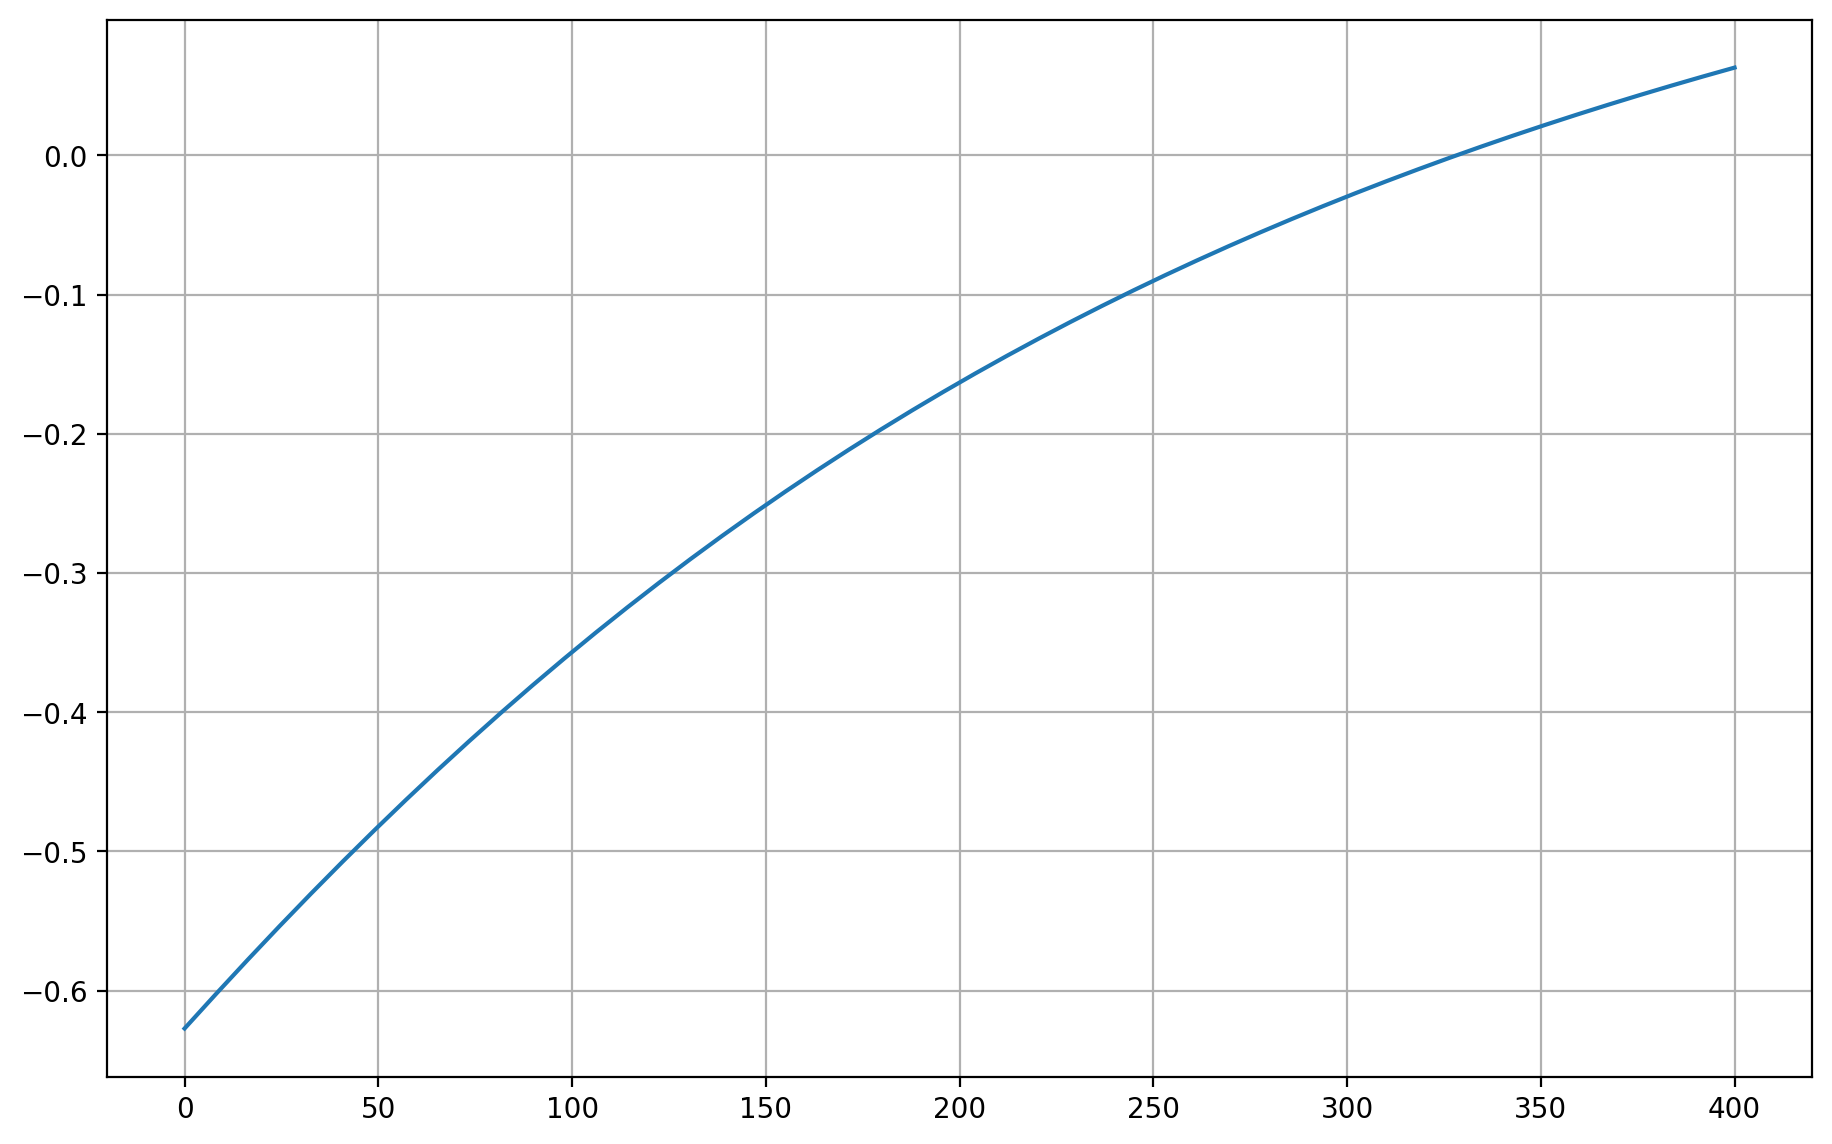

In [186]:
import numpy as np
import timeit as tm
import matplotlib.pyplot as plt
r=np.linspace(0,400)
fig = plt.figure(figsize=(11,7),dpi=200)
plt.plot(r,f(r))
plt.grid()
plt.show()

<h1> Método da Bissecção</h1>

In [177]:
a=0
b=400
epsilon=1e-4
def bissec(a,b,f,epsilon):
    i=0
    while(1):
        x= (a+b) / 2 

        if f(a) * f(x) < 0:
            b = x
        else:
            a = x
        
        if  ((abs(b-a)) < epsilon) or (abs(f(x)) < epsilon):
                break
        i=i+1
    return x,i
inicio = tm.default_timer()
x,i=bissec(a,b,f,epsilon)
fim =  tm.default_timer()
print('Solução: {0:f} \nTempo: {1:f} \nIterações: {2:d}'.format(x,(fim-inicio),i))

Solução: 328.125000 
Tempo: 0.000237 
Iterações: 6


<h1> Método da Falsa Posição</h1>

In [178]:
def false_pos(a,b,f,epsilon):
    i=0
    while(1): 
        x=(a*f(b)-b*f(a)) /(f(b)-f(a)) 

        if f(a) * f(x) < 0:
            b = x
        else:
            a = x
        if  ((abs(b-a)) < epsilon) or (abs(f(x)) < epsilon): 
            break
        i+=1   
    return x,i
inicio = tm.default_timer()
x,i=false_pos(a,b,f,epsilon)
fim =  tm.default_timer()
print('Solução: {0:f} \nTempo: {1:f} \nIterações: {2:d}'.format(x,(fim-inicio),i))

Solução: 328.199698 
Tempo: 0.003085 
Iterações: 9


<h1> Método de Newton</h1>

In [179]:
def derivate (f,symbol):
    x=sy.Symbol(symbol)
    f_l = f.diff(x)
    fi = x - (f/f_l)
    fi = sy.lambdify(x,fi,"numpy") 
    return fi

In [180]:
def newton(x,f_s,f,symbol,epsilon):
    fi=derivate(f_s,symbol)
    i=0
    while (1):
        fx=f(x)
        aux=fi(x)
        if epsilon > abs(fx) or abs(aux-x)<epsilon:
            break
        x=aux
        i+=1
    return x,i
inicio = tm.default_timer()
x,i=newton(1.5,f_r,f,'R',epsilon)
fim =  tm.default_timer()
print('Solução: {0:f} \nTempo: {1:f} \nIterações: {2:d}'.format(x,(fim-inicio),i))

Solução: 328.149271 
Tempo: 0.016318 
Iterações: 4


<h1> Método das Secantes</h1>

In [184]:
def secant(a,b,f,epsilon):
    i=0
    while(1):
        x=( b * f(a)-(a)*f(b))/(f(a)-f(b))
        if epsilon > abs(f(x)): # criterio  de parad
            break
        a=b
        b=x
        i+=1
    return x,i
inicio = tm.default_timer()
x,i=secant(a,b,f,epsilon)
fim =  tm.default_timer()
print('Solução: {0:f} \nTempo: {1:f} \nIterações: {2:d}'.format(x,(fim-inicio),i))

Solução: 328.154047 
Tempo: 0.000281 
Iterações: 3
